In [ ]:
#importing librarie
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
# read data 
import numpy as np
import pandas as pd
df=pd.read_csv('/content/owid-covid-data (1).csv')
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202350,PAN,North America,Panama,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,9.9,NaN,2.3,78.51,0.815,4408582.0,NaN,NaN,NaN,NaN
202351,PAN,North America,Panama,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,9.9,NaN,2.3,78.51,0.815,4408582.0,NaN,NaN,NaN,NaN
202352,PAN,North America,Panama,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,9.9,NaN,2.3,78.51,0.815,4408582.0,NaN,NaN,NaN,NaN
202353,PAN,North America,Panama,2020-01-08,NaN,0.0,0.0,NaN,0.0,0.0,...,9.9,NaN,2.3,78.51,0.815,4408582.0,NaN,NaN,NaN,NaN


In [ ]:
# rename columns
df.describe()
df.drop(['new_deaths_smoothed','new_cases_per_million',],axis=1,inplace=True)
df.shape
df.rename(columns={'date': 'Date','location':'Country','continent': 'Continent','iso_code':'ISO_code'},inplace=True)
df.head()

,ISO_code,Continent,Country,Date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,total_cases_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [ ]:
#list continent name
cont_list=list(df.Continent.unique())
cont_list

['Asia', nan, 'Europe', 'Africa', 'Oceania', 'North America', 'South America']

In [ ]:
#replace missing value with constant value
imputer=SimpleImputer(strategy='constant')
df0=pd.DataFrame(imputer.fit_transform(df),columns=df.columns)

In [ ]:
#groupby helps to form a subset of data by dividing our data into different group and perform data analysis
df1=df0.groupby(['Date','Country'])[['total_cases','total_deaths','total_vaccinations']].sum().reset_index()
df1

,Date,Country,total_cases,total_deaths,total_vaccinations
0,2020-01-01,Argentina,missing_value,missing_value,missing_value
1,2020-01-01,Mexico,missing_value,missing_value,missing_value
2,2020-01-02,Argentina,missing_value,missing_value,missing_value
3,2020-01-02,Mexico,missing_value,missing_value,missing_value
4,2020-01-03,Afghanistan,missing_value,missing_value,missing_value
...,...,...,...,...,...
202350,2023-03-17,Denmark,missing_value,missing_value,missing_value
202351,2023-03-17,France,missing_value,missing_value,missing_value
202352,2023-03-17,Germany,missing_value,missing_value,missing_value
202353,2023-03-17,Israel,missing_value,missing_value,missing_value


In [ ]:
#simple imputer place missing values by a constant value replacing the constant value to zero
df1['total_cases'].replace({'missing_value':0},inplace=True)
df1['total_deaths'].replace({'missing_value':0},inplace=True)
df1['total_vaccinations'].replace({'missing_value':0},inplace=True)
df1

,Date,Country,total_cases,total_deaths,total_vaccinations
0,2020-01-01,Argentina,0.0,0.0,0.0
1,2020-01-01,Mexico,0.0,0.0,0.0
2,2020-01-02,Argentina,0.0,0.0,0.0
3,2020-01-02,Mexico,0.0,0.0,0.0
4,2020-01-03,Afghanistan,0.0,0.0,0.0
...,...,...,...,...,...
202350,2023-03-17,Denmark,0.0,0.0,0.0
202351,2023-03-17,France,0.0,0.0,0.0
202352,2023-03-17,Germany,0.0,0.0,0.0
202353,2023-03-17,Israel,0.0,0.0,0.0


In [ ]:
#finding total countries whose total_deaths greaterthan 100000
df2=df1[df1['total_deaths']>1000000]
countries=df2['Country'].unique()
len(countries)

6

In [ ]:
#listing countries (total death greaterthan 1 lakh)
country_death_greaterthan1000000=list(df2.Country.unique())
country_death_greaterthan1000000

['High income',
 'Europe',
 'Asia',
 'Lower middle income',
 'North America',
 'European Union']

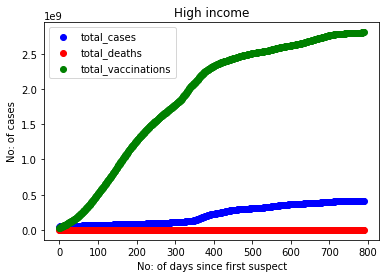

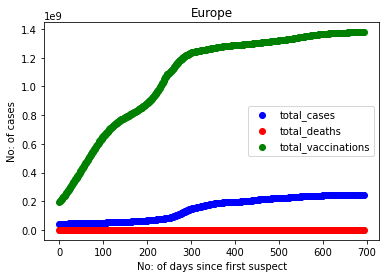

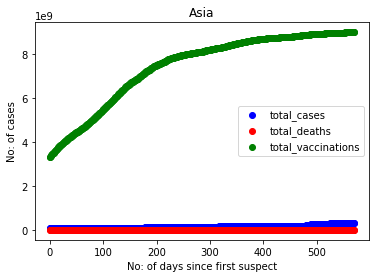

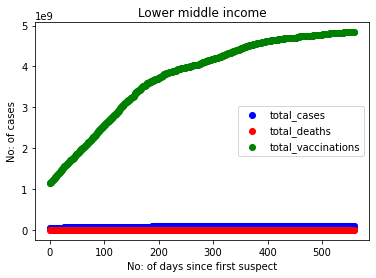

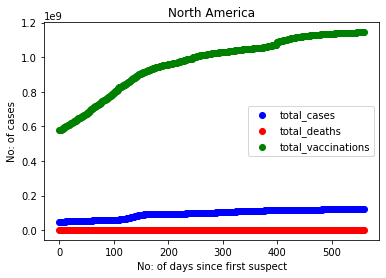

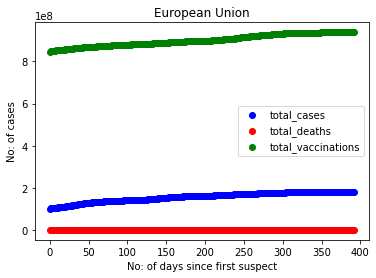

In [ ]:
#trend of counries listed above  using a scatter plot.(for loop to get the countries graph)
for i in range(0,len(countries)):
    C=df2[df2['Country']==countries[i]]
    plt.scatter(np.arange(0,len(C)),C['total_cases'],color='blue',label='total_cases')
    plt.scatter(np.arange(0,len(C)),C['total_deaths'],color='red',label='total_deaths')
    plt.scatter(np.arange(0,len(C)),C['total_vaccinations'],color='green',label='total_vaccinations')
    plt.title(countries[i])
    plt.xlabel("No: of days since first suspect")
    plt.ylabel("No: of cases")
    plt.legend()
    plt.show()

In [ ]:
df3=df2.groupby(['Country'])[['total_cases','total_deaths']].sum().reset_index()
df3

,Country,total_cases,total_deaths
0,Asia,8.953530e+10,7.945970e+08
1,Europe,1.051105e+11,1.132915e+09
2,European Union,6.172273e+10,4.461814e+08
3,High income,1.749312e+11,1.669474e+09
4,Lower middle income,4.765982e+10,7.088340e+08
5,North America,5.338426e+10,7.818626e+08


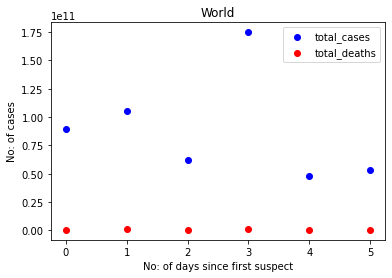

In [ ]:
C=df3
plt.scatter(np.arange(0,len(C)),C['total_cases'],color='blue',label='total_cases')
plt.scatter(np.arange(0,len(C)),C['total_deaths'],color='red',label='total_deaths')
plt.title('World')
plt.xlabel('No: of days since first suspect')
plt.ylabel('No: of cases')
plt.legend()
plt.show()

In [ ]:
#how many dates we have in total where total_deaths is greater than 1000000
date=df2['Date'].unique()
len(date)

790

In [ ]:
df4=df2.groupby(['Date'])[['total_cases','total_deaths']].sum().reset_index()
df4

,Date,total_cases,total_deaths
0,2021-01-16,4.863891e+07,1003038.0
1,2021-01-17,4.910149e+07,1010965.0
2,2021-01-18,4.947826e+07,1018477.0
3,2021-01-19,4.982987e+07,1025880.0
4,2021-01-20,5.020380e+07,1033923.0
...,...,...,...
785,2023-03-12,1.361869e+09,10624553.0
786,2023-03-13,1.361969e+09,10624975.0
787,2023-03-14,1.362122e+09,10625705.0
788,2023-03-15,1.362287e+09,10626181.0


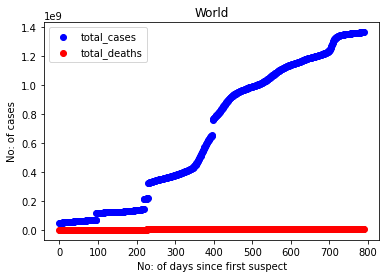

In [ ]:
C=df4
plt.scatter(np.arange(0,len(C)),C['total_cases'],color='blue',label='total_cases')
plt.scatter(np.arange(0,len(C)),C['total_deaths'],color='red',label='total_deaths')
plt.title('World')
plt.xlabel('No: of days since first suspect')
plt.ylabel('No: of cases')
plt.legend()
plt.show()